In [2]:
# Step 1: Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")  # To avoid unnecessary warnings

# Step 2: Load your dataset
df = pd.read_csv('C:/Users/TEMP.NDOCY.000/Desktop/Employee_Compensation_SF.csv')


In [3]:

# Step 3: Initial Data Exploration
# Display the first few rows of the dataframe
print("Initial Data Preview:")
print(df.head())



Initial Data Preview:
   index Year Type  Year  Organization Group Code    Organization Group  \
0      0    Fiscal  2016                        1     Public Protection   
1      1  Calendar  2013                        5  Culture & Recreation   
2      2  Calendar  2015                        4      Community Health   
3      3    Fiscal  2015                        4      Community Health   
4      4    Fiscal  2014                        5  Culture & Recreation   

  Department Code                      Department  Union Code  \
0             DAT               District Attorney       311.0   
1             ART                 Arts Commission       790.0   
2             DPH                   Public Health       535.0   
3             DPH                   Public Health       250.0   
4             REC  Recreation and Park Commission       790.0   

                               Union Job Family Code  ... Employee Identifier  \
0   Municipal Attorneys' Association            8100  .

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
index                       0
Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                 43
Union                      43
Job Family Code            45
Job Family                 45
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64


In [5]:
# Step 4: Data Cleaning
# Drop columns that are not needed for the analysis
df_cleaned = df[['Year', 'Salaries', 'Overtime', 'Other Salaries', 'Union', 'Job Family']]



In [6]:
# Handling missing values
df_cleaned['Union'].fillna('Unknown', inplace=True)
df_cleaned['Job Family'].fillna('Unknown', inplace=True)




In [7]:
# Step 5: Prepare the data for ARIMA
# Create a 'Date' column based on 'Year'
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Year'].astype(str) + '-01-01')  # Assuming yearly data

# Calculate total savings for each year
df_cleaned['Savings'] = df_cleaned['Salaries'] + df_cleaned['Overtime'] + df_cleaned['Other Salaries']



In [8]:
# Aggregate yearly data
monthly_data = df_cleaned.groupby('Date').agg({'Savings': 'sum'}).reset_index()



In [9]:
# Step 6: Set Date as the index (for ARIMA)
monthly_data.set_index('Date', inplace=True)



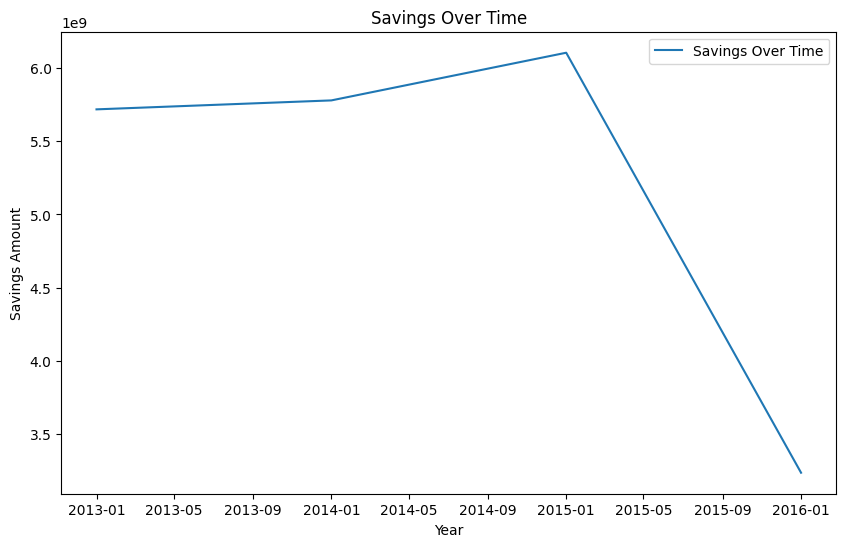

In [10]:
# Step 7: Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Savings'], label='Savings Over Time')
plt.title('Savings Over Time')
plt.xlabel('Year')
plt.ylabel('Savings Amount')
plt.legend()
plt.show()



In [11]:
# Step 8: Fit the ARIMA model
# You can try different (p, d, q) parameters for ARIMA. Start with (1,1,1).
model = ARIMA(monthly_data['Savings'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()



In [12]:
# Step 9: Forecast the future
# Forecasting the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)



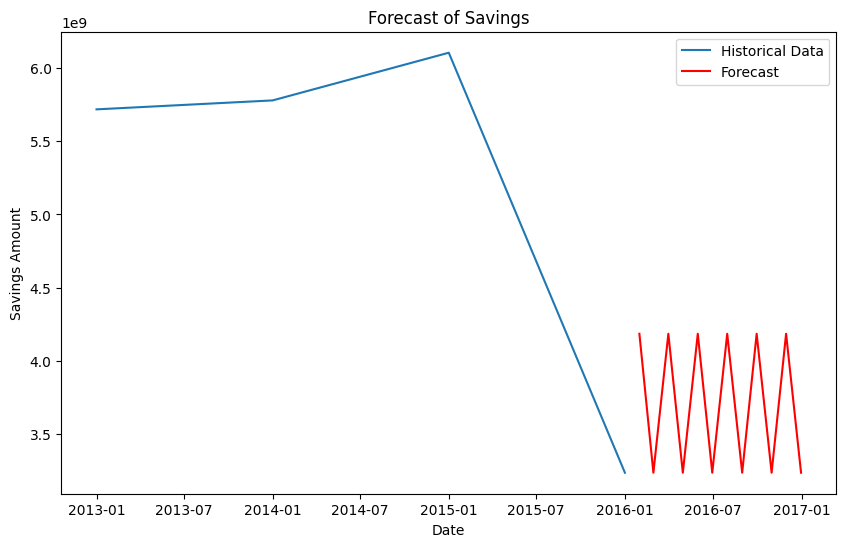


Forecast Details:
2017-01-01    4.185137e+09
2018-01-01    3.236361e+09
2019-01-01    4.185113e+09
2020-01-01    3.236385e+09
2021-01-01    4.185088e+09
2022-01-01    3.236410e+09
2023-01-01    4.185064e+09
2024-01-01    3.236434e+09
2025-01-01    4.185040e+09
2026-01-01    3.236458e+09
2027-01-01    4.185016e+09
2028-01-01    3.236482e+09
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [13]:
# Step 10: Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Savings'], label='Historical Data')
plt.plot(pd.date_range(start=monthly_data.index[-1], periods=forecast_steps, freq='M'),
         forecast, label='Forecast', color='red')
plt.title('Forecast of Savings')
plt.xlabel('Date')
plt.ylabel('Savings Amount')
plt.legend()
plt.show()

# Optional: Print forecast details
print("\nForecast Details:")
print(forecast)